In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [2]:
def bench(source, n=2**20, p=50, cc='g++'):
    res = !{cc} -std=c++17 -O3 -funroll-loops -march=native -D N={n} -D P={p} {source}.cc -o run && ./run
    print(source, n, res)
    return float(res[0].split()[0])

ns = list(int(1.17**k) for k in range(50, 100))

In [44]:
bench('find-extended-64', n=2**13)

find-extended-64 8192 ['42.63 GFLOPS', '6408']


42.63

In [40]:
bench('find-extended', n=2**13)

find-extended 8192 ['43.59 GFLOPS', '6408']


43.59

In [ ]:
bench('find-simd', n=2**16)

In [21]:
bench('find-std', n=2**13)

find-std 8192 ['4.18 GFLOPS', '6408']


4.18

In [23]:
bench('find-ilp', n=2**13)

find-ilp 8192 ['34.09 GFLOPS', '6408']


34.09

In [6]:
bench('find-simd', n=2**13)

find-simd 8192 ['21.48 GFLOPS', '6408']


21.48

In [42]:
bench('blend-autovec', n=2**12)

blend-autovec 4096 ['12.98 GFLOPS', '1508481368']


12.98

In [23]:
bench('blend-simd', n=2**12)

blend-simd 4096 ['8.95 GFLOPS', '1508481368']


8.95

In [41]:
bench('blend-simd-and', n=2**12)

blend-simd-and 4096 ['12.35 GFLOPS', '1404258952']


12.35

In [32]:
bench('blend-extensions', n=2**12)

blend-extensions 4096 ['13.21 GFLOPS', '1508481368']


13.21

No idea why it doesn't vectorize optimally.

In [140]:
bench('find-simple', n=2**12)

find-simple 4096 ['4.40 GFLOPS', '891']


4.4

In [141]:
bench('find-simd', n=2**12)

find-simd 4096 ['19.63 GFLOPS', '891']


19.63

In [142]:
bench('find-testz', n=2**12)

find-testz 4096 ['19.41 GFLOPS', '891']


19.41

In [143]:
bench('count-simple', n=2**13)

count-simple 8192 ['15.33 GFLOPS', '99995586']


15.33

In [144]:
bench('count-simd', n=2**13)

count-simd 8192 ['14.98 GFLOPS', '99995586']


14.98

In [145]:
bench('count-minus', n=2**13)

count-minus 8192 ['21.93 GFLOPS', '99995586']


21.93

In [71]:
bench('queries-simple', n=2**15)

queries-simple 32768 ['0.84 GFLOPS', '-1758958565']


0.84

In [72]:
bench('queries-gather', n=2**15)

queries-gather 32768 ['0.96 GFLOPS', '-1758958565']


0.96

In [114]:
bench('popcnt-builtin', n=2**15)

popcnt-builtin 32768 ['1.98 GFLOPS', '938445458']


1.98

In [115]:
bench('popcnt-builtin2', n=2**15)

popcnt-builtin2 32768 ['3.92 GFLOPS', '938445458']


3.92

In [100]:
bench('popcnt-lookup', n=2**15)

popcnt-lookup 32768 ['0.49 GFLOPS', '938445458']


0.49

In [98]:
bench('popcnt-lookup-16', n=2**15)

popcnt-lookup-16 32768 ['0.66 GFLOPS', '938445458']


0.66

In [101]:
bench('popcnt-pshufb', n=2**15)

popcnt-pshufb 32768 ['7.35 GFLOPS', '938445458']


7.35

In [150]:
bench('popcnt-naive', n=2**15)

popcnt-naive 32768 ['0.05 GFLOPS', '938445458']


0.05

In [112]:
bench('filter-simple', n=2**15)

filter-simple 32768 ['0.33 GFLOPS', '16340 546219']


0.33

In [113]:
bench('filter-simd', n=2**15)

filter-simd 32768 ['4.48 GFLOPS', '16340 546219']


4.48

In [116]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None, xlabel='Array size', loc='best'):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel(xlabel)

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc=loc)

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [119]:
queries_simple = [bench('queries-simple', n=n) for n in ns]

queries-simple 2566 ['1.75 GFLOPS', '729550110']
queries-simple 3002 ['1.77 GFLOPS', '1779150977']
queries-simple 3512 ['1.76 GFLOPS', '1143932659']
queries-simple 4110 ['1.76 GFLOPS', '-1382676554']
queries-simple 4808 ['1.79 GFLOPS', '-801267149']
queries-simple 5626 ['1.68 GFLOPS', '-1959817831']
queries-simple 6582 ['1.68 GFLOPS', '-210017022']
queries-simple 7701 ['1.72 GFLOPS', '2059185419']
queries-simple 9011 ['1.68 GFLOPS', '567078052']
queries-simple 10543 ['1.48 GFLOPS', '1053835611']
queries-simple 12335 ['1.22 GFLOPS', '317248149']
queries-simple 14432 ['1.14 GFLOPS', '628961850']
queries-simple 16885 ['1.03 GFLOPS', '2136739020']
queries-simple 19756 ['0.96 GFLOPS', '1150700932']
queries-simple 23115 ['0.91 GFLOPS', '396520129']
queries-simple 27044 ['0.88 GFLOPS', '639124620']
queries-simple 31642 ['0.82 GFLOPS', '-1393643667']
queries-simple 37021 ['0.82 GFLOPS', '-1831662348']
queries-simple 43315 ['0.81 GFLOPS', '-1148373861']
queries-simple 50678 ['0.79 GFLOPS', '-14

In [121]:
queries_gather = [bench('queries-gather', n=n) for n in ns]

queries-gather 2566 ['0.94 GFLOPS', '729550110']
queries-gather 3002 ['0.96 GFLOPS', '1779150977']
queries-gather 3512 ['0.95 GFLOPS', '1143932659']
queries-gather 4110 ['0.95 GFLOPS', '-1382676554']
queries-gather 4808 ['0.95 GFLOPS', '-801267149']
queries-gather 5626 ['0.96 GFLOPS', '-1959817831']
queries-gather 6582 ['0.95 GFLOPS', '-210017022']
queries-gather 7701 ['0.95 GFLOPS', '2059185419']
queries-gather 9011 ['0.95 GFLOPS', '567078052']
queries-gather 10543 ['0.96 GFLOPS', '1053835611']
queries-gather 12335 ['0.95 GFLOPS', '317248149']
queries-gather 14432 ['0.94 GFLOPS', '628961850']
queries-gather 16885 ['0.96 GFLOPS', '2136739020']
queries-gather 19756 ['0.95 GFLOPS', '1150700932']
queries-gather 23115 ['0.96 GFLOPS', '396520129']
queries-gather 27044 ['0.96 GFLOPS', '639124620']
queries-gather 31642 ['0.96 GFLOPS', '-1393643667']
queries-gather 37021 ['0.95 GFLOPS', '-1831662348']
queries-gather 43315 ['0.93 GFLOPS', '-1148373861']
queries-gather 50678 ['0.92 GFLOPS', '-14

In [146]:
bench('queries-simple', n=2**12)

queries-simple 4096 ['1.75 GFLOPS', '-2007809973']


1.75

In [147]:
bench('queries-simple', n=2**12, cc='clang++')

queries-simple 4096 ['1.22 GFLOPS', '-2007809973']


1.22

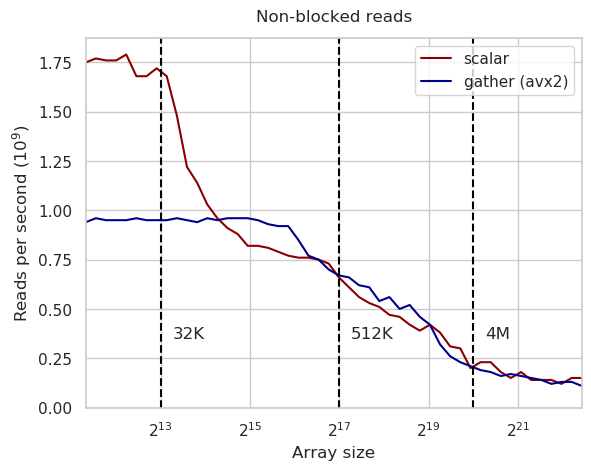

In [126]:
plt.plot(ns, queries_simple, color='darkred', label='scalar')
plt.plot(ns, queries_gather, color='darkblue', label='gather (avx2)')
plot('Non-blocked reads', 'Reads per second ($10^9$)', 'gather.svg', 0.35, legend=True)

In [129]:
ps = list(range(101))
filter_simple = [bench('filter-simple', n=2**12, p=p) for p in ps]

filter-simple 4096 ['1.55 GFLOPS', '0 0']
filter-simple 4096 ['1.30 GFLOPS', '42 0']
filter-simple 4096 ['1.16 GFLOPS', '76 80']
filter-simple 4096 ['1.17 GFLOPS', '119 69']
filter-simple 4096 ['1.21 GFLOPS', '157 94']
filter-simple 4096 ['1.24 GFLOPS', '205 850']
filter-simple 4096 ['1.23 GFLOPS', '246 179']
filter-simple 4096 ['1.21 GFLOPS', '278 1849']
filter-simple 4096 ['1.19 GFLOPS', '318 124']
filter-simple 4096 ['1.18 GFLOPS', '361 457']
filter-simple 4096 ['1.18 GFLOPS', '396 3584']
filter-simple 4096 ['1.16 GFLOPS', '434 5228']
filter-simple 4096 ['1.13 GFLOPS', '475 1461']
filter-simple 4096 ['1.12 GFLOPS', '509 2701']
filter-simple 4096 ['1.11 GFLOPS', '544 1696']
filter-simple 4096 ['1.09 GFLOPS', '582 2105']
filter-simple 4096 ['1.07 GFLOPS', '619 11048']
filter-simple 4096 ['1.06 GFLOPS', '656 5333']
filter-simple 4096 ['1.04 GFLOPS', '700 7584']
filter-simple 4096 ['1.02 GFLOPS', '744 4977']
filter-simple 4096 ['1.01 GFLOPS', '774 10996']
filter-simple 4096 ['0.94 GFLOP

IndexError: list index out of range

In [131]:
filter_simd = [bench('filter-simd', n=2**12, p=p) for p in ps]

filter-simd 4096 ['4.31 GFLOPS', '0 0']
filter-simd 4096 ['4.26 GFLOPS', '42 0']
filter-simd 4096 ['4.27 GFLOPS', '76 80']
filter-simd 4096 ['4.27 GFLOPS', '119 69']
filter-simd 4096 ['4.27 GFLOPS', '157 94']
filter-simd 4096 ['4.26 GFLOPS', '205 850']
filter-simd 4096 ['4.27 GFLOPS', '246 179']
filter-simd 4096 ['4.26 GFLOPS', '278 1849']
filter-simd 4096 ['4.26 GFLOPS', '318 124']
filter-simd 4096 ['4.28 GFLOPS', '361 457']
filter-simd 4096 ['4.26 GFLOPS', '396 3584']
filter-simd 4096 ['4.24 GFLOPS', '434 5228']
filter-simd 4096 ['4.27 GFLOPS', '475 1461']
filter-simd 4096 ['4.25 GFLOPS', '509 2701']
filter-simd 4096 ['4.26 GFLOPS', '544 1696']
filter-simd 4096 ['4.27 GFLOPS', '582 2105']
filter-simd 4096 ['4.27 GFLOPS', '619 11048']
filter-simd 4096 ['4.20 GFLOPS', '656 5333']
filter-simd 4096 ['4.26 GFLOPS', '700 7584']
filter-simd 4096 ['4.26 GFLOPS', '744 4977']
filter-simd 4096 ['4.27 GFLOPS', '774 10996']
filter-simd 4096 ['4.26 GFLOPS', '810 2172']
filter-simd 4096 ['4.27 GFLO

In [132]:
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump([queries_simple, queries_gather, filter_simple, filter_simd], f)

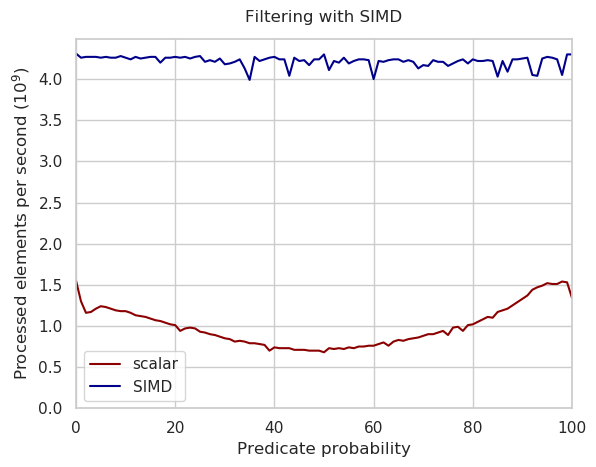

In [139]:
plt.plot(ps, filter_simple, color='darkred', label='scalar')
plt.plot(ps, filter_simd, color='darkblue', label='SIMD')

plt.xlabel('Predicate probability')

plt.ylabel('Processed elements per second ($10^9$)')

plt.title('Filtering with SIMD', pad=12)

plt.legend(loc='best')

plt.ylim(bottom=0)
plt.margins(0)

fig = plt.gcf()
fig.savefig('filter.svg')

plt.show()